step 1 : importing required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

step 2 : data_collection

In [ ]:
dataset = 'spam.csv'
df = pd.read_csv(dataset, encoding='latin-1', names=['label', 'message'])

step 3 : data preprocessing

In [ ]:
# Drop rows with missing values
df.dropna(subset=['message'], inplace=True)

# Converting text to lowercase
df['message'] = df['message'].str.lower()

# Removing special characters and very short words
df['message'] = df['message'].str.replace(r'\W', ' ')
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

<ipython-input-59-0b7d71f7724c>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'\W', ' ')


step 4 : feature extraction

In [ ]:
# Creating the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting text data into numerical features using CountVectorizer
X = vectorizer.fit_transform(df['message'])
y = df['label']

step 5 : model selection

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initializing the model
model = MultinomialNB()

step 6 : model training

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

MultinomialNB()

step 7 : model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5
Classification Report:
                    precision    recall  f1-score   support

 why to miss them       0.00      0.00      0.00         1
               GE       0.50      1.00      0.67         1

         accuracy                           0.50         2
        macro avg       0.25      0.50      0.33         2
     weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[0 1]
 [0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step 8 : predictions

In [ ]:
# New messages
new_messages = ['Get a discount on our products today!', 'Hey, how are you?']

# Preprocess the new messages
new_messages = [' '.join(re.sub('[^a-zA-Z]', ' ', x.lower()).split()) for x in new_messages]

# Vectorize the new messages
new_messages_vectorized = vectorizer.transform(new_messages)

# Make predictions
new_predictions = model.predict(new_messages_vectorized)
print("New Messages Predictions:", new_predictions)

New Messages Predictions: [' TX 4 FONIN HON' ' TX 4 FONIN HON']


step 9 : visualizations

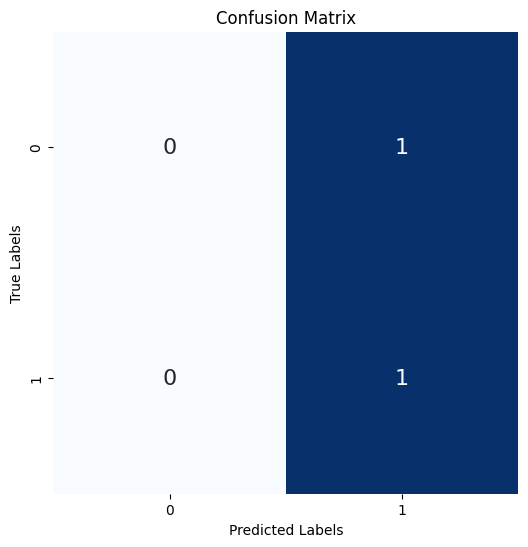

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

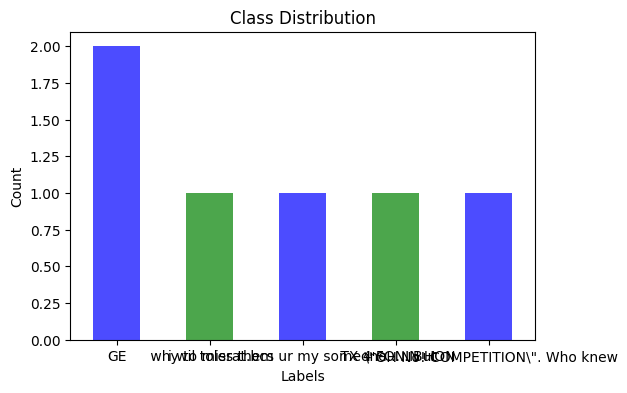

In [ ]:
# Class distribution bar chart
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()